In [507]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [508]:
#importing file limit=1000
df=pd.read_csv("Retail_Transactions_Dataset.csv",nrows=1000)

In [509]:
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


#### Data Preprocessing

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     1000 non-null   int64  
 1   Date               1000 non-null   object 
 2   Customer_Name      1000 non-null   object 
 3   Product            1000 non-null   object 
 4   Total_Items        1000 non-null   int64  
 5   Total_Cost         1000 non-null   float64
 6   Payment_Method     1000 non-null   object 
 7   City               1000 non-null   object 
 8   Store_Type         1000 non-null   object 
 9   Discount_Applied   1000 non-null   bool   
 10  Customer_Category  1000 non-null   object 
 11  Season             1000 non-null   object 
 12  Promotion          643 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 94.9+ KB


In [511]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

In [512]:
#droping product column
df.drop('Product',axis=1,inplace=True)

In [513]:
#changing date column's format
df['Date']=pd.to_datetime(df['Date'])

In [514]:
#checking duplicates
df.duplicated().sum()

0

In [515]:
#checking null values
df.isnull().sum()

Transaction_ID         0
Date                   0
Customer_Name          0
Total_Items            0
Total_Cost             0
Payment_Method         0
City                   0
Store_Type             0
Discount_Applied       0
Customer_Category      0
Season                 0
Promotion            357
dtype: int64

In [516]:
#filling promotion column's null data with No Promotion
df['Promotion']=df['Promotion'].fillna("No Promotion")

#### Analytical data

In [517]:
# season vs city Count total items
df.pivot_table(values='Total_Items',index='Season',columns='City',aggfunc='sum')

City,Atlanta,Boston,Chicago,Dallas,Houston,Los Angeles,Miami,New York,San Francisco,Seattle
Season,,,,,,,,,,
Fall,94,134,128,152,105,171,159,159,198,147
Spring,148,121,147,151,160,115,132,95,157,176
Summer,98,110,141,89,115,161,130,109,148,117
Winter,178,115,208,157,145,166,152,54,205,156


There is always a minimum no of sales in the summer and maximum no of sales in winter

In [518]:
#checking costs and items by city
df.pivot_table(index='City',values=['Transaction_ID','Total_Items','Total_Cost'],
               aggfunc={'Transaction_ID': 'count', 'Total_Items': 'sum', 'Total_Cost': 'sum'})

,Total_Cost,Total_Items,Transaction_ID
City,,,
Atlanta,4577.86,518,90
Boston,4775.43,480,86
Chicago,5554.17,624,110
Dallas,5160.77,549,103
Houston,5025.67,525,94
Los Angeles,5551.83,613,108
Miami,6008.34,573,104
New York,3882.62,417,76
San Francisco,6986.52,708,125


In [519]:
#items sold in whole season
df.pivot_table(index='Season',values=['Transaction_ID','Total_Items'],aggfunc={'Transaction_ID':'count','Total_Items':'sum'})

,Total_Items,Transaction_ID
Season,,
Fall,1447,257
Spring,1402,253
Summer,1218,216
Winter,1536,274


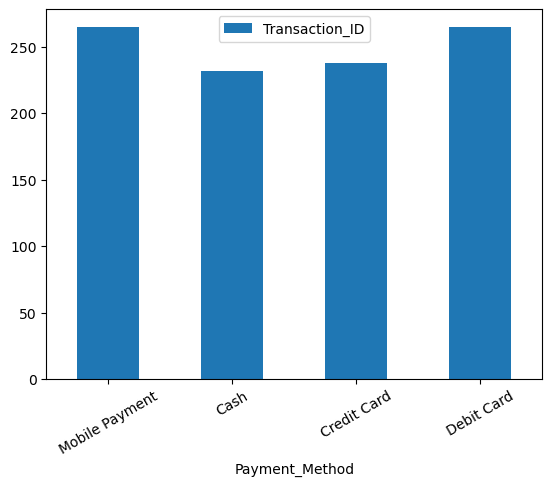

In [541]:
#visualizing payment methods with no of users
paym=df.pivot_table(index='Payment_Method',values='Transaction_ID',aggfunc='count',sort=False)
paym.plot(kind='bar')
plt.xticks(rotation=30)
plt.savefig("fig")

<Axes: xlabel='City'>

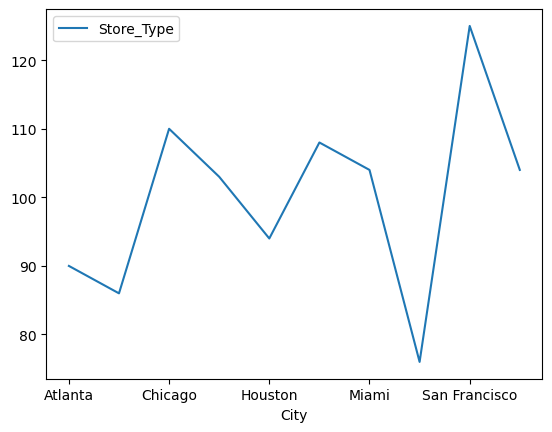

In [542]:
#no of store in cities
s_type=df.pivot_table(index='City',values='Store_Type',aggfunc='count')
s_type.plot()

<Axes: xlabel='Season'>

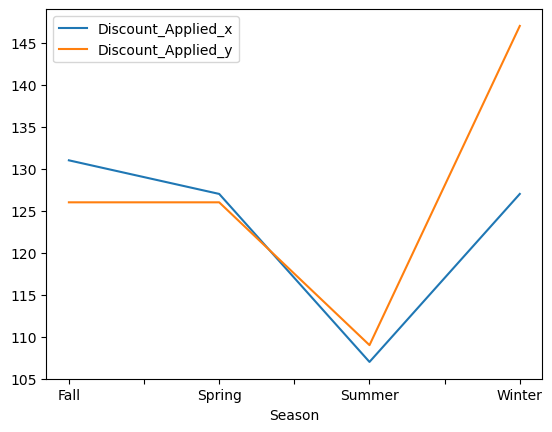

In [528]:
#discount and no discount in seasons
dis_y=df[df['Discount_Applied']==True]
dis_n=df[df['Discount_Applied']==False]

d1=dis_y.pivot_table(index='Season',values='Discount_Applied',aggfunc='count')
d2=dis_n.pivot_table(index='Season',values='Discount_Applied',aggfunc='count')
dd=pd.merge(d1,d2,on='Season')
dd.plot()

<Axes: xlabel='Date'>

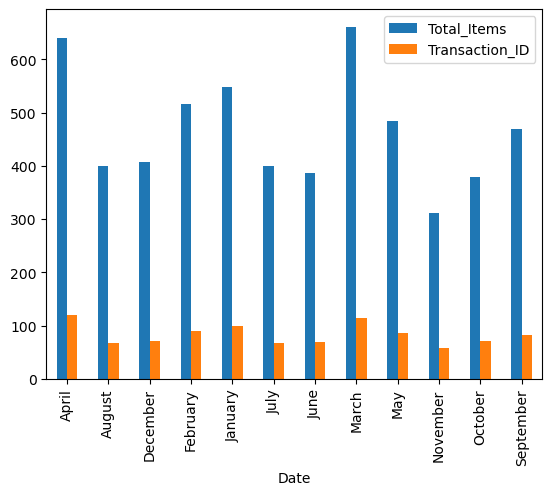

In [523]:
#monthly transactions and sold items
month=df['Date'].dt.month_name()
monthly=df.pivot_table(index=month,values=['Transaction_ID','Total_Items'],aggfunc={'Transaction_ID':'count','Total_Items':'sum'})
monthly.plot(kind='bar')

In [524]:
#heavy shoppers with their costs and total items
cust=df.groupby('Customer_Name',sort=False)[['Total_Items','Total_Cost']].sum()
sorted=cust.sort_values(by='Total_Items', ascending=False)
sorted.head(10).reset_index()

,Customer_Name,Total_Items,Total_Cost
0,James Smith,26,149.29
1,Melissa Freeman,15,107.81
2,Michele Davis,14,102.88
3,Michael Johnson,14,141.37
4,Jessica Crawford,13,103.56
5,Derrick Chen,10,75.92
6,Victor Stein,10,64.22
7,Kimberly Gomez,10,96.09
8,Andrea Weeks,10,45.61
9,Christopher Small,10,71.17


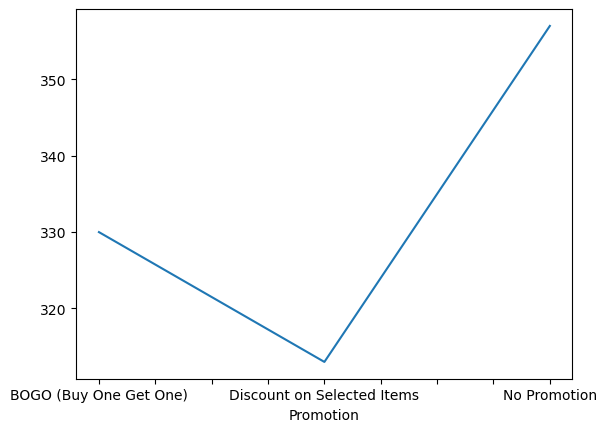

In [540]:
#promotion with their transactions
prom=df.groupby('Promotion')['Transaction_ID'].count()
prom.plot()
plt.savefig('figure_1.jpg', dpi=300)

In [526]:
#customer segmentation with their transactions
value=df.groupby('Customer_Category')['Total_Cost'].sum()
sorted=value.sort_values(ascending=False)
sorted

Customer_Category
Senior Citizen    6847.91
Teenager          6803.86
Homemaker         6688.73
Young Adult       6619.92
Student           6541.71
Middle-Aged       6511.28
Professional      6428.38
Retiree           6276.86
Name: Total_Cost, dtype: float64

In [527]:
#store type with total costs
value=df.groupby('Store_Type')['Total_Cost'].sum()
sorted=value.sort_values(ascending=False)
sorted

Store_Type
Convenience Store    9658.78
Department Store     9386.65
Supermarket          8694.25
Specialty Store      8575.86
Pharmacy             8505.58
Warehouse Club       7897.53
Name: Total_Cost, dtype: float64